In [ ]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




This notebook is my approach to solving https://www.kaggle.com/c/titanic/data. To solve it I used my own knowledge and sources like https://medium.com/analytics-vidhya/your-guide-for-logistic-regression-with-titanic-dataset-784943523994
 and learnings from book https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=sr_1_1?keywords=hands+on+machine+learning+with+scikit-learn+and+tensorflow+2&qid=1647080490&sprefix=hands+on+%2Caps%2C178&sr=8-1 

In [ ]:
test_set = pd.read_csv("./drive/MyDrive/kaggle_data/titanic/test.csv")
train_set = pd.read_csv("./drive/MyDrive/kaggle_data/titanic/train.csv")

In [ ]:
from seaborn import load_dataset # this method will help us to #download the Titanic dataset
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
# if you use jupyter notebook
plt.style.use('ggplot') # check for more with plt.style.available

#data = load_dataset("titanic")
#data
train_set.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


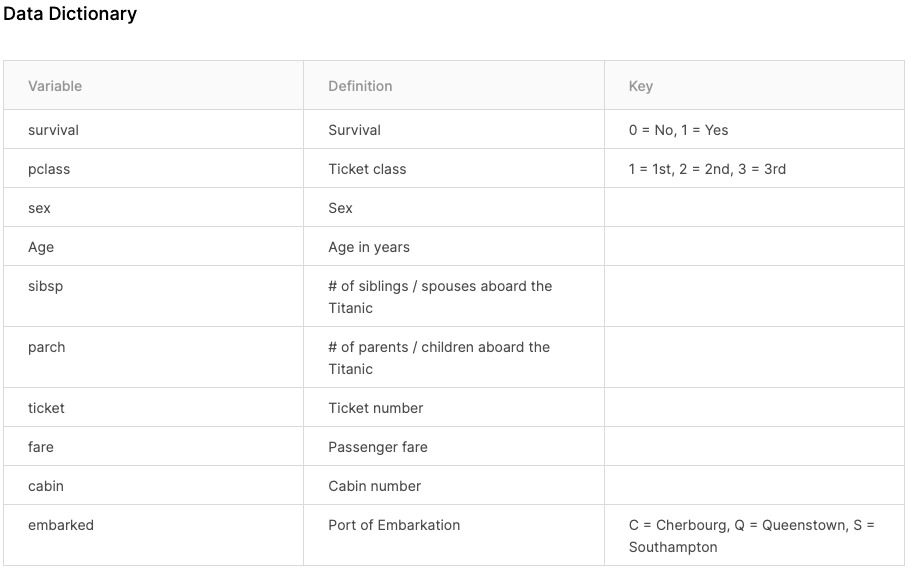
---



In [ ]:
#columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck']
#data_2 = data.drop(columns, axis=1)
train_set['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [ ]:
train_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(f"Max value of age column : {train_set['Age'].max()}")
print(f"Min value of age column : {train_set['Age'].min()}")

Max value of age column : 80.0
Min value of age column : 0.42


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46e1810250>,
      dtype=object)

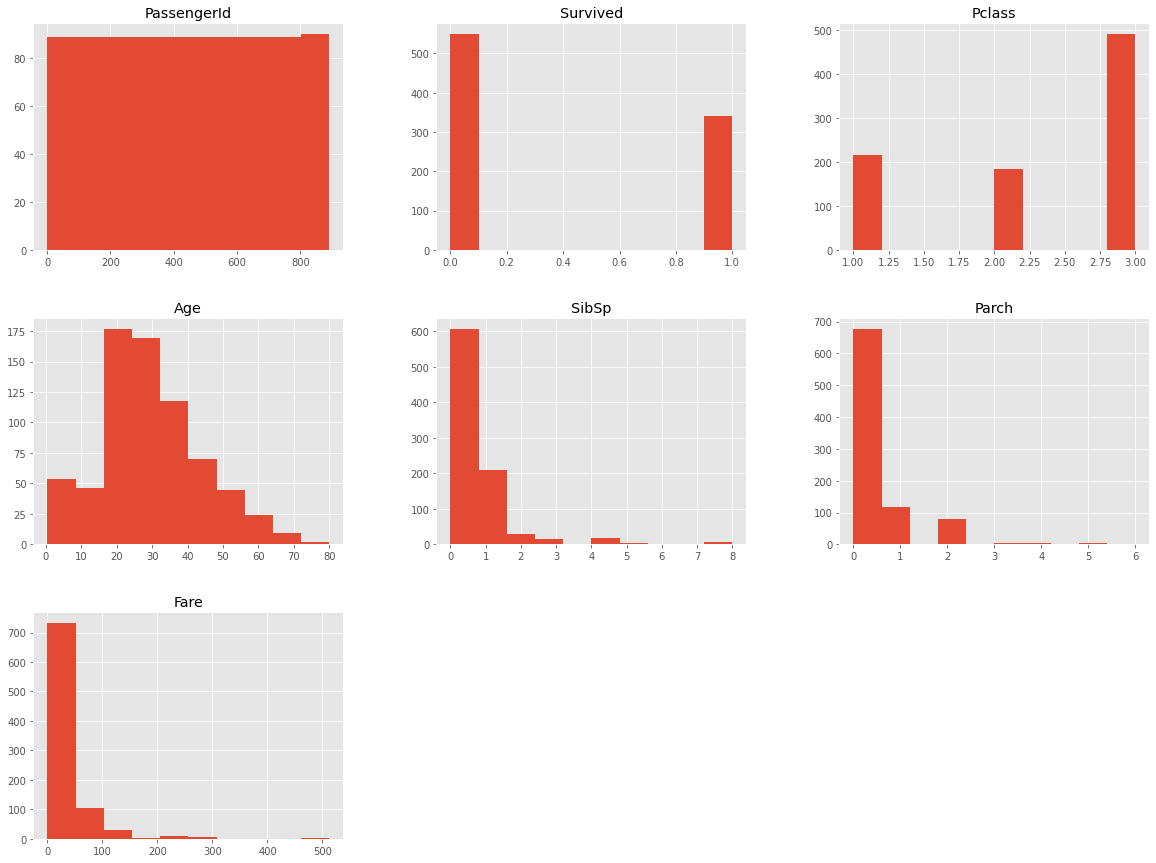

In [ ]:
train_set.hist(figsize=(20,15))

In [ ]:
train_set['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [ ]:
train_set.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46e13a67d0>,
      dtype=object)

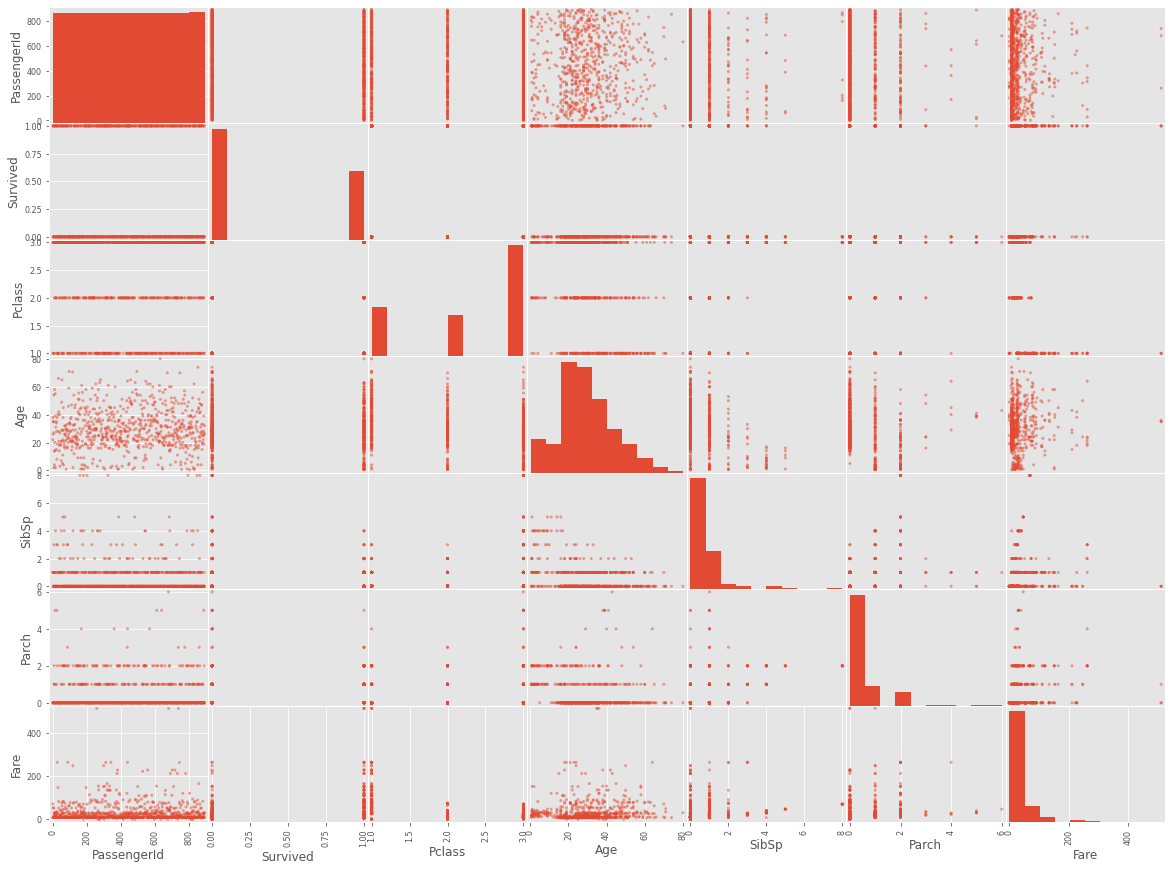

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_set, figsize = (20,15))


In [ ]:
data_2 = train_set.copy()
data_2.describe()
data_2_test = test_set.copy()

In [ ]:
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data_2['Age'] = pd.cut(data_2['Age'], bins = bins, labels=labels)

bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'high']
data_2['Fare'] = pd.cut(data_2["Fare"], bins = bins, labels = labels)

bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data_2_test['Age'] = pd.cut(data_2_test['Age'], bins = bins, labels=labels)

bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'high']
data_2_test['Fare'] = pd.cut(data_2_test["Fare"], bins = bins, labels = labels)

data_2['Age'].describe()
data_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Young,1,0,A/5 21171,low,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,high,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,medium-low,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,high,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,medium-low,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,Adult,0,0,211536,medium-low,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,Young,0,0,112053,medium,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,medium,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,Adult,0,0,111369,medium,C148,C


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    category
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    category
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(2), int64(5), object(5)
memory usage: 71.9+ KB


,PassengerId,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594
std,257.353842,0.486592,0.836071,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000


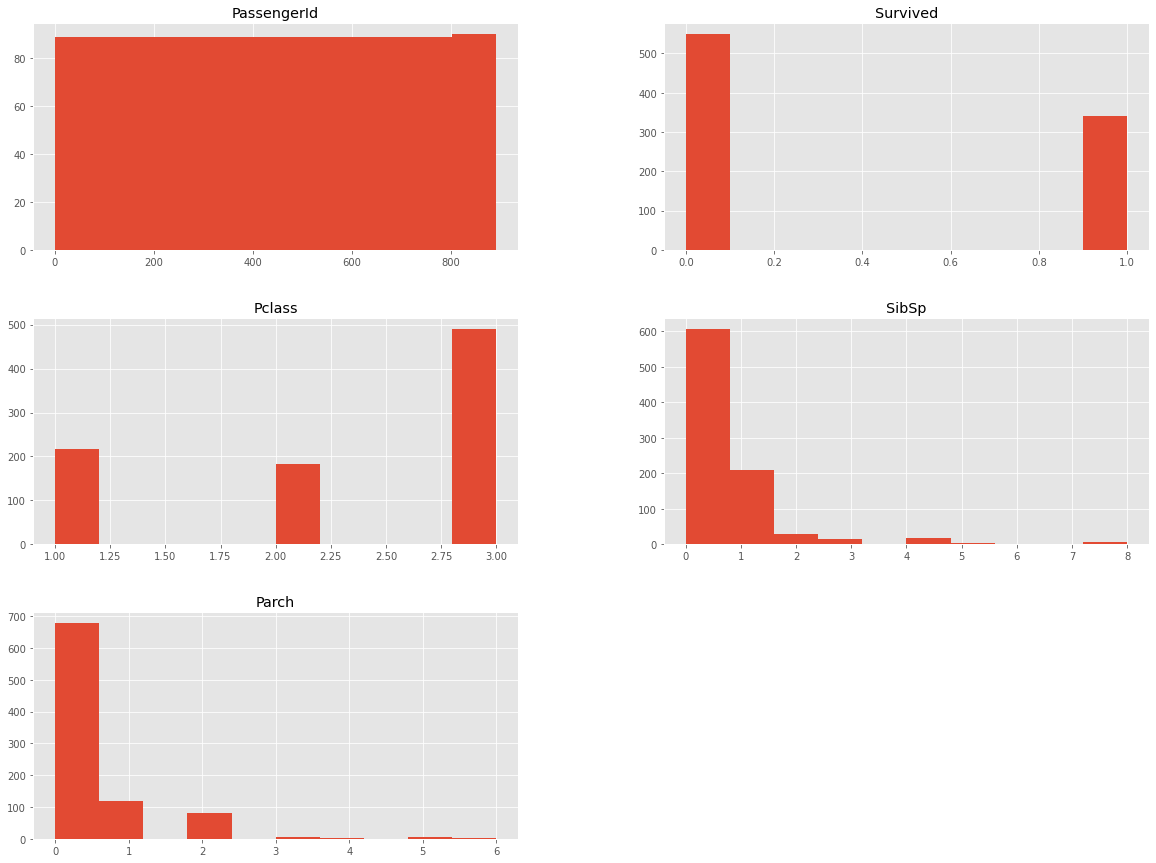

In [ ]:
data_2.hist(figsize=(20,15))
data_2.describe()

In [ ]:
data_2.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
data_2_test.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
pd.DataFrame(data_2['Age'].value_counts())

,Age
Adult,349
Young,188
Kid,69
Old,64
Infant,44


In [ ]:
data_2['Age'].mode()[0]
data_2_test['Age'].mode()[0]

'Adult'

In [ ]:
data_4 = data_2.fillna({'Age' : data_2['Age'].mode()[0]})
data_4_test = data_2_test.fillna({'Age' : data_2['Age'].mode()[0]})

In [ ]:
data_2['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
print(f"How many 'S' on embarked column : {data_2[data_2['Embarked'] == 'S'].shape[0]}")
print(f"How many 'C' on embarked column : {data_2[data_2['Embarked'] == 'C'].shape[0]}")
print(f"How many 'Q' on embarked column : {data_2[data_2['Embarked'] == 'Q'].shape[0]}")

How many 'S' on embarked column : 644
How many 'C' on embarked column : 168
How many 'Q' on embarked column : 77


In [ ]:
data_3 = data_2.fillna({'Embarked' : 'S'})
data_3_test = data_2_test.fillna({'Embarked' : 'S'})

In [ ]:
data_4[['Pclass', 'Survived']].groupby(['Pclass']).sum().sort_values(by='Survived')

,Survived
Pclass,
2,87
3,119
1,136


In [ ]:
data_4[['Sex', 'Survived']].groupby(['Sex']).sum().sort_values(by='Survived')

,Survived
Sex,
male,109
female,233


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


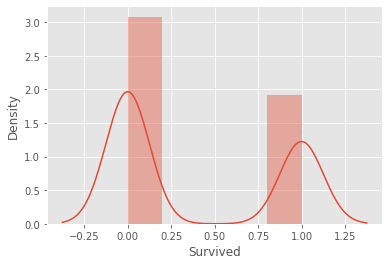

In [ ]:
data_5 = data_2.copy()
data_5_test = data_2_test.copy()
sns.distplot(data_5['Survived'])

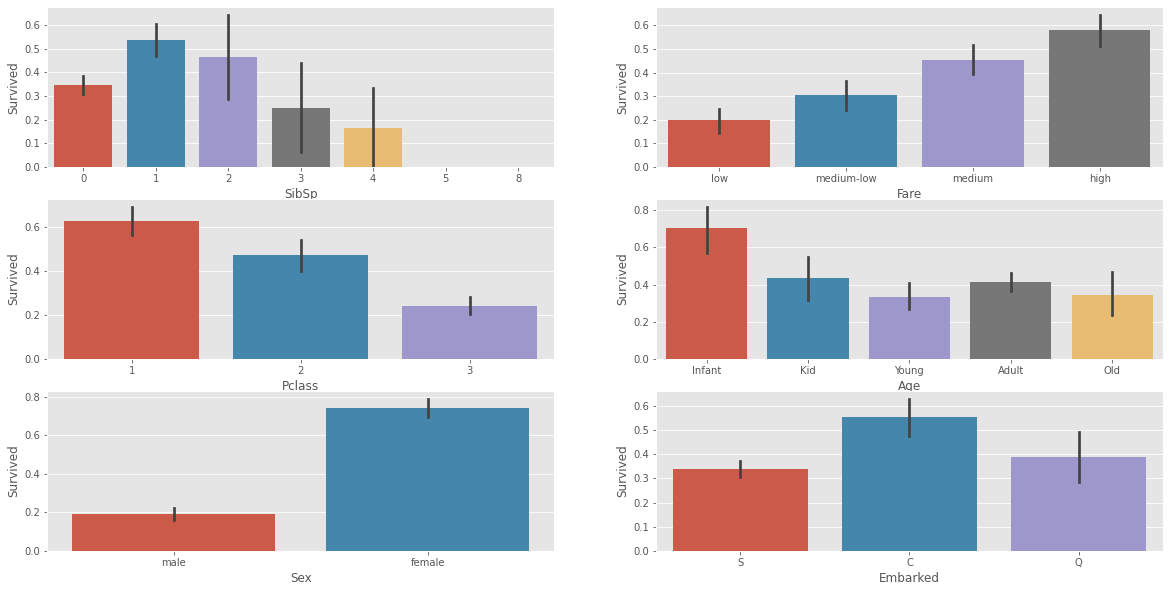

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.barplot(x = 'SibSp', y = 'Survived', data = data_5)
plt.subplot(322)
sns.barplot(x = 'Fare', y = 'Survived', data = data_5)
plt.subplot(323)
sns.barplot(x = 'Pclass', y = 'Survived', data = data_5)
plt.subplot(324)
sns.barplot(x = 'Age', y = 'Survived', data = data_5)
plt.subplot(325)
sns.barplot(x = 'Sex', y = 'Survived', data = data_5)
plt.subplot(326)
sns.barplot(x = 'Embarked', y = 'Survived', data = data_5);

In [ ]:
dummies = ['Fare', 'Age', 'Embarked', 'Sex']
dummy_data = pd.get_dummies(data_5[dummies])
dummy_data_test = pd.get_dummies(data_5_test[dummies])

In [ ]:
data_6 = pd.concat([data_5, dummy_data], axis = 1)
data_6.drop(dummies, axis=1, inplace=True)
data_6.info()
data_6_test = pd.concat([data_5_test, dummy_data_test], axis = 1)
data_6_test.drop(dummies, axis=1, inplace=True)
data_6_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   PassengerId      891 non-null    int64
 1   Survived         891 non-null    int64
 2   Pclass           891 non-null    int64
 3   SibSp            891 non-null    int64
 4   Parch            891 non-null    int64
 5   Fare_low         891 non-null    uint8
 6   Fare_medium-low  891 non-null    uint8
 7   Fare_medium      891 non-null    uint8
 8   Fare_high        891 non-null    uint8
 9   Age_Infant       891 non-null    uint8
 10  Age_Kid          891 non-null    uint8
 11  Age_Young        891 non-null    uint8
 12  Age_Adult        891 non-null    uint8
 13  Age_Old          891 non-null    uint8
 14  Embarked_C       891 non-null    uint8
 15  Embarked_Q       891 non-null    uint8
 16  Embarked_S       891 non-null    uint8
 17  Sex_female       891 non-null    uint8
 18  Sex_male  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
X_train = data_6.drop('Survived', axis = 1)
y_train = data_6['Survived']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
# X contains independent values, y contains dependent value

In [ ]:
X_train

,PassengerId,Pclass,SibSp,Parch,Fare_low,Fare_medium-low,Fare_medium,Fare_high,Age_Infant,Age_Kid,Age_Young,Age_Adult,Age_Old,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,3,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
1,2,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,3,3,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0
3,4,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
4,5,3,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
887,888,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
888,889,3,1,2,0,0,1,0,0,0,0,0,0,0,0,1,1,0
889,890,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(data_6_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
result = pd.DataFrame()
result['Survived'] = pd.Series(y_pred)
result.set_index(data_6_test['PassengerId'], inplace=True)
result


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [ ]:
result.to_csv('/content/drive/MyDrive/kaggle_data/titanic/submission.csv')